<a href="https://colab.research.google.com/github/LMatthews24/Portfolio-Projects/blob/main/Wildfire_Risk_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px

In [2]:
import pandas as pd
import numpy as np

#Import and setup matplotlib:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

mpl.style.use('ggplot') # optional: for ggplot-like style

#Import Primary Modules:
from PIL import Image # converting images into arrays

#import seaborn
import seaborn as sns

#import wordcloud
import wordcloud

from wordcloud import WordCloud, STOPWORDS

In [3]:
# Define custom colors using the provided hex codes
custom_colors = ['#D93DFF', '#EDF134', '#00FFCF', '#E4D6E8', 'black']

In [4]:
import matplotlib.font_manager
print(matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf'))

['/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf', '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bol

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# load file into dataframe
df = pd.read_csv('/content/drive/My Drive/NRI_Table_CensusTracts_Converted_smaller.csv') # Replace with the actual path
print(df.head())

     STATE STATEABBRV   COUNTY   TRACTFIPS  POPULATION  BUILDVALUE  AGRIVALUE  \
0  Alabama         AL  Autauga  1001020100        1775   291570314      42944   
1  Alabama         AL  Autauga  1001020200        2055   465551259       2451   
2  Alabama         AL  Autauga  1001020300        3216   581703828      46581   
3  Alabama         AL  Autauga  1001020400        4246   636608405      76026   
4  Alabama         AL  Autauga  1001020501        4322   658502938     175679   

       AREA  WFIR_RISKS      WFIR_RISKR NRI_VER  
0  3.842958   37.231841        Very Low  Mar-23  
1  1.297330   52.859963  Relatively Low  Mar-23  
2  2.089747   65.379584  Relatively Low  Mar-23  
3  2.493149   43.811540        Very Low  Mar-23  
4  2.419425   48.212672        Very Low  Mar-23  


In [7]:
df.columns

Index(['STATE', 'STATEABBRV', 'COUNTY', 'TRACTFIPS', 'POPULATION',
       'BUILDVALUE', 'AGRIVALUE', 'AREA', 'WFIR_RISKS', 'WFIR_RISKR',
       'NRI_VER'],
      dtype='object')

In [8]:
df.describe

<bound method NDFrame.describe of                 STATE STATEABBRV      COUNTY    TRACTFIPS  POPULATION  \
0             Alabama         AL     Autauga   1001020100        1775   
1             Alabama         AL     Autauga   1001020200        2055   
2             Alabama         AL     Autauga   1001020300        3216   
3             Alabama         AL     Autauga   1001020400        4246   
4             Alabama         AL     Autauga   1001020501        4322   
...               ...        ...         ...          ...         ...   
85149  Virgin Islands         VI  St. Thomas  78030960800        3158   
85150  Virgin Islands         VI  St. Thomas  78030960900        3720   
85151  Virgin Islands         VI  St. Thomas  78030961000        4385   
85152  Virgin Islands         VI  St. Thomas  78030961100        3780   
85153  Virgin Islands         VI  St. Thomas  78030961200        2122   

       BUILDVALUE  AGRIVALUE      AREA  WFIR_RISKS         WFIR_RISKR NRI_VER  
0       291570314      42944  3.842958   37.231841           Very Low  Mar-23  
1       465551259       2451  1.297330   52.859963     Relatively Low  Mar-23  
2       581703828      46581  2.089747   65.379584     Relatively Low  Mar-23  
3       636608405      76026  2.493149   43.811540           Very Low  Mar-23  
4       658502938     175679  2.419425   48.212672           Very Low  Mar-23  
...           ...        ...       ...         ...                ...     ...  
85149  1066439279          0  4.452584         NaN  Insufficient Data  Mar-23  
85150   791533855          0  4.344706         NaN  Insufficient Data  Mar-23  
85151   789915937          0  1.699768         NaN  Insufficient Data  Mar-23  
85152   871264723          0  1.356900         NaN  Insufficient Data  Mar-23  
85153   522732751          0  0.742349         NaN  Insufficient Data  Mar-23  

[85154 rows x 11 columns]>

In [9]:
df.describe(include='all')

,STATE,STATEABBRV,COUNTY,TRACTFIPS,POPULATION,BUILDVALUE,AGRIVALUE,AREA,WFIR_RISKS,WFIR_RISKR,NRI_VER
count,85154,85154,85154,8.515400e+04,85154.000000,8.515400e+04,8.515400e+04,85154.000000,84092.000000,85154,85154
unique,56,56,1920,NaN,NaN,NaN,NaN,NaN,NaN,7,1
top,California,CA,Los Angeles,NaN,NaN,NaN,NaN,NaN,NaN,Relatively Low,Mar-23
freq,9106,9106,2495,NaN,NaN,NaN,NaN,NaN,NaN,29010,85154
mean,NaN,NaN,NaN,2.841582e+10,3930.776088,7.324973e+08,5.239694e+06,43.993462,46.927257,NaN,NaN
std,NaN,NaN,NaN,1.656884e+10,1698.185335,5.468153e+08,2.811636e+07,545.511268,32.870063,NaN,NaN
min,NaN,NaN,NaN,1.001020e+09,0.000000,0.000000e+00,0.000000e+00,0.008300,0.000000,NaN,NaN
25%,NaN,NaN,NaN,1.301596e+10,2737.000000,4.225453e+08,0.000000e+00,0.694953,25.000892,NaN,NaN
50%,NaN,NaN,NaN,2.805904e+10,3760.000000,6.277612e+08,4.544000e+03,1.881827,50.000595,NaN,NaN
75%,NaN,NaN,NaN,4.201710e+10,4928.000000,9.127169e+08,8.318228e+05,11.889650,75.000297,NaN,NaN


In [10]:
df.dtypes

,0
STATE,object
STATEABBRV,object
COUNTY,object
TRACTFIPS,int64
POPULATION,int64
BUILDVALUE,int64
AGRIVALUE,int64
AREA,float64
WFIR_RISKS,float64
WFIR_RISKR,object


In [11]:
# Filter the dataframe to only include Very High risk areas
vhigh = "Very High"  # Replace with the desired response
vhigh_df = df[df["WFIR_RISKR"] == vhigh]

In [12]:
print(vhigh_df.head())

       STATE STATEABBRV                COUNTY   TRACTFIPS  POPULATION  \
1520  Alaska         AK  Fairbanks North Star  2090001300        5612   
1526  Alaska         AK  Fairbanks North Star  2090001700        1345   
1527  Alaska         AK  Fairbanks North Star  2090001901        5700   
1528  Alaska         AK  Fairbanks North Star  2090001902        5247   
1542  Alaska         AK       Kenai Peninsula  2122000400        7014   

      BUILDVALUE  AGRIVALUE         AREA  WFIR_RISKS WFIR_RISKR NRI_VER  
1520  2780992364    1421978    31.940801   99.468439  Very High  Mar-23  
1526   357868839    3240730  1395.105641   99.223470  Very High  Mar-23  
1527  1130442829      61338   806.386026   99.357846  Very High  Mar-23  
1528  1174053807    1547853  3411.857649   99.586168  Very High  Mar-23  
1542  2267916165    2473560  2129.301519   99.839462  Very High  Mar-23  


In [13]:
# Apply value_counts() on column 'STATEABBRV'
vhigh_df['STATEABBRV'].value_counts()

,count
STATEABBRV,
CA,342
UT,43
AZ,41
ID,36
WA,35
TX,32
FL,29
NV,25
NM,25


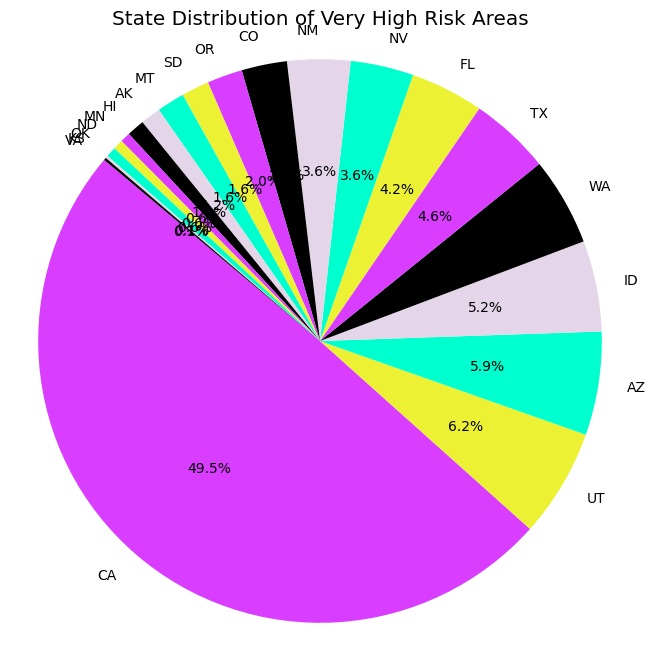

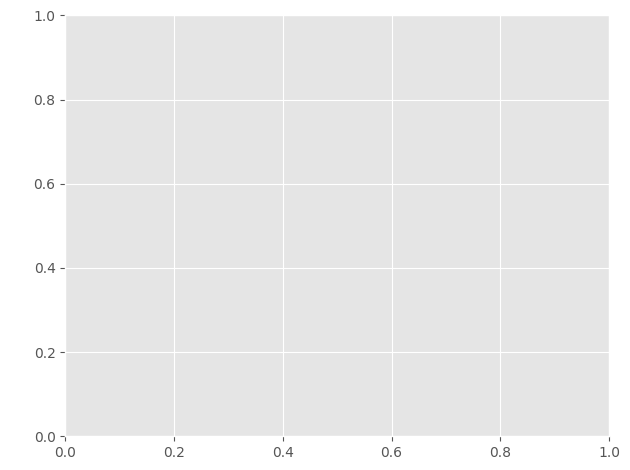

<ipython-input-32-de40cdb9074d>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index, y=state_counts.values, palette=custom_colors)
<ipython-input-32-de40cdb9074d>:16: UserWarning: 
The palette list has fewer values (5) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=state_counts.index, y=state_counts.values, palette=custom_colors)


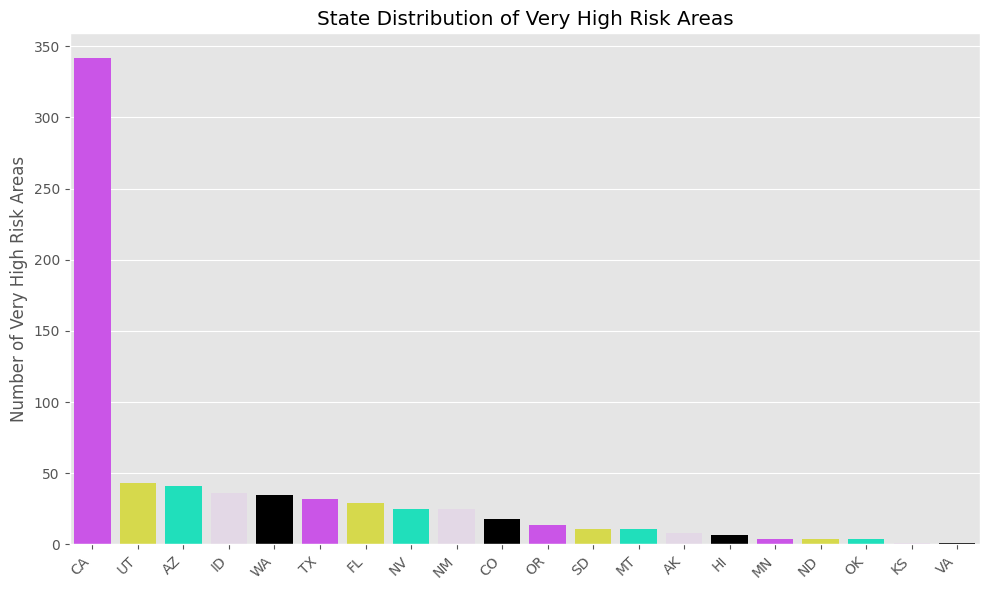

In [32]:
# Count occurrences of each state
state_counts = vhigh_df['STATEABBRV'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=140, colors=custom_colors)
plt.title('State Distribution of Very High Risk Areas')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
plt.ylabel(' ')
plt.tight_layout()
plt.show()

# Bar chart as an alternative visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=state_counts.index, y=state_counts.values, palette=custom_colors)
plt.title('State Distribution of Very High Risk Areas')
plt.xlabel('')
plt.ylabel('Number of Very High Risk Areas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [16]:
# Count occurrences of each state
state_counts = vhigh_df['STATEABBRV'].value_counts()

# Filter out 'CA' entries
state_counts_filtered = state_counts[state_counts.index !='CA']

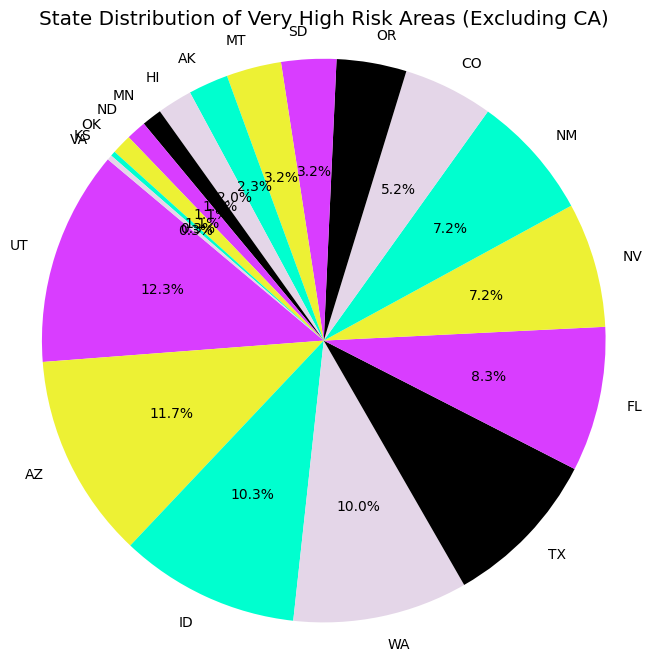

In [17]:
# Count occurrences of each state
state_counts = vhigh_df['STATEABBRV'].value_counts()

# Filter out 'CA' entries
state_counts_filtered = state_counts[state_counts.index != 'CA']

# Create a pie chart without 'CA'
plt.figure(figsize=(8, 8))
plt.pie(state_counts_filtered, labels=state_counts_filtered.index, autopct='%1.1f%%', startangle=140, colors=custom_colors)
plt.title('State Distribution of Very High Risk Areas (Excluding CA)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

([<matplotlib.patches.Wedge at 0x7e5d51820b10>,
 [Text(-0.5773872165605322, -0.9362820099481145, 'CA'),
  Text(1.0799418093032038, -0.20910688300226438, 'UT'),
  Text(1.070959159237731, 0.2510905797611935, 'AZ'),
  Text(0.8973576194045922, 0.6361991063311258, 'ID'),
  Text(0.6190722795741231, 0.9092576712147658, 'WA'),
  Text(0.2844036281182317, 1.0625980313896628, 'TX'),
  Text(-0.04905459897514625, 1.0989056585164114, 'FL'),
  Text(-0.3414363213047808, 1.0456678432914817, 'NV'),
  Text(-0.5903831008590521, 0.9281421196239563, 'NM'),
  Text(-0.7754287387763048, 0.7801988663666396, 'CO')],
 [Text(-0.31493848176029027, -0.510699278153517, '342'),
  Text(0.5890591687108384, -0.11405829981941693, '43'),
  Text(0.5841595414023987, 0.13695849805156007, '41'),
  Text(0.4894677924025048, 0.3470176943624322, '36'),
  Text(0.33767578885861255, 0.4959587297535085, '35'),
  Text(0.15512925170085365, 0.5795989262125433, '32'),
  Text(-0.02675705398644341, 0.599403086463497, '29'),
  Text(-0.186237

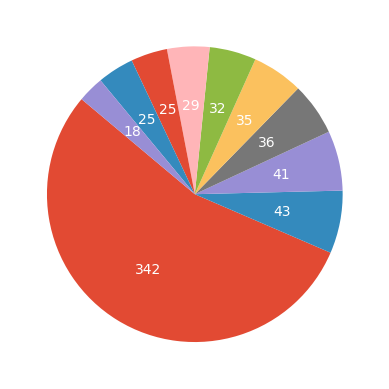

In [62]:
# Count occurrences of each state
state_counts = vhigh_df['STATEABBRV'].value_counts()

# Filter out 'CA' entries (if still needed)
# state_counts_filtered = state_counts[state_counts.index != 'CA']

# Get the top 10 states
top_10_states = state_counts.head(10)

# Create a pie chart with hard numbers and top 10 states
plt.figure(figsize=(8, 8))
plt.pie(top_10_states, labels=top_10_states.index, autopct=lambda p: f'{p * top_10_states.sum() / 100:.0f}', startangle=140, textprops={'color': "white"})  # Add textprops)
plt.title('Top 10 State Distribution of Very High Risk Areas')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend([f'Number of High-Risk Areas'], loc='best')

plt.show()

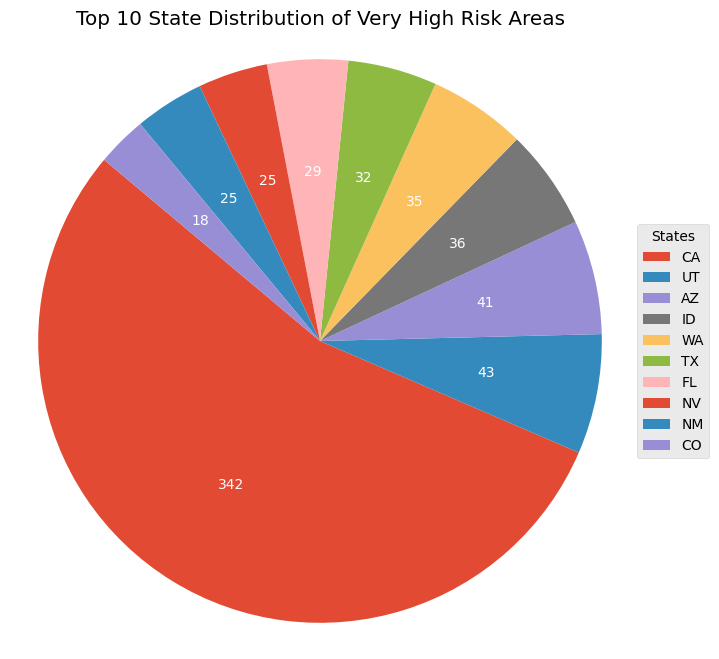

In [64]:
# Count occurrences of each state
state_counts = vhigh_df['STATEABBRV'].value_counts()

# Get the top 10 states
top_10_states = state_counts.head(10)

# Create a pie chart with hard numbers and top 10 states
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(top_10_states,
                                  autopct=lambda p: f'{p * top_10_states.sum() / 100:.0f}',
                                  startangle=140,
                                  textprops={'color': "white"})  # Add textprops)

# Add segment labels (state abbreviations)
plt.legend(wedges, top_10_states.index, title="States", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


plt.title('Top 10 State Distribution of Very High Risk Areas')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

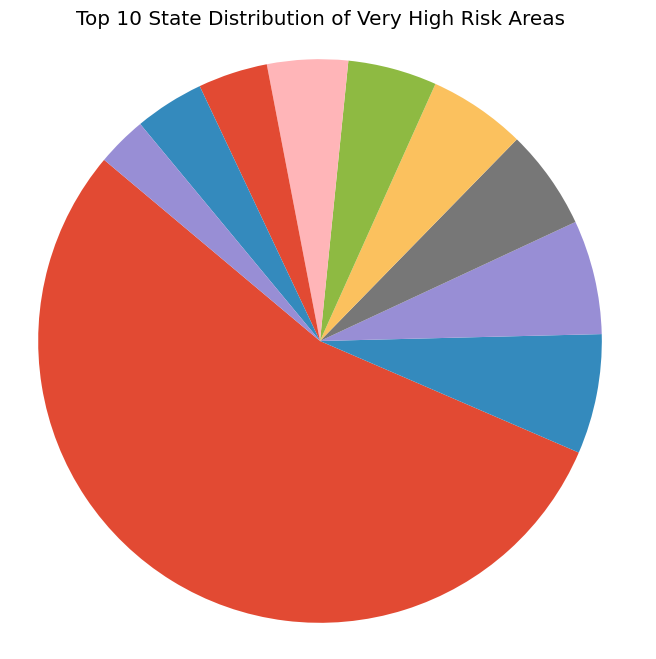

In [73]:
# Count occurrences of each state
state_counts = vhigh_df['STATEABBRV'].value_counts()

# Get the top 10 states
top_10_states = state_counts.head(10)

# Create a pie chart with hard numbers and top 10 states, with labels beside segments
plt.figure(figsize=(8, 8))
plt.pie(top_10_states,
        labels=top_10_states.index,  # Add labels here
        autopct=lambda p: f'{p * top_10_states.sum() / 100:.0f}',
        startangle=140,
        textprops={'color': "white"},
        pctdistance=1.15,  # Adjust this to move labels further out
        labeldistance=1.05) # Adjust this to move segment labels closer in

plt.title('Top 10 State Distribution of Very High Risk Areas')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

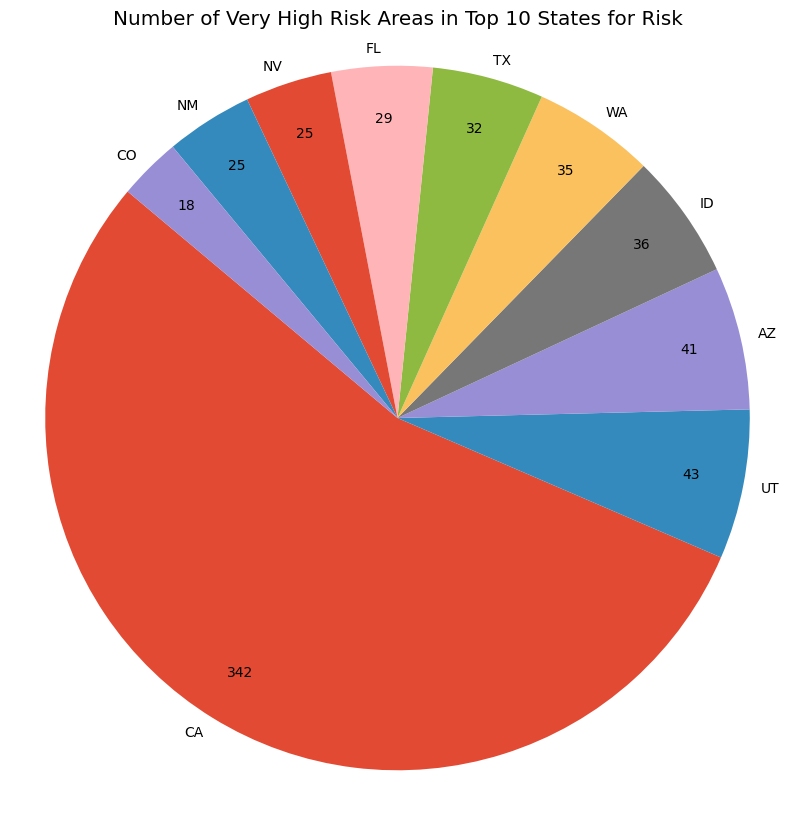

In [84]:
# Count occurrences of each state
state_counts = vhigh_df['STATEABBRV'].value_counts()

# Get the top 10 states
top_10_states = state_counts.head(10)

# Create a pie chart with hard numbers and top 10 states
plt.figure(figsize=(10, 10))  # Increased figure size
plt.pie(top_10_states,
        labels=top_10_states.index,
        autopct=lambda p: f'{p * sum(top_10_states) / 100:.0f}',
        startangle=140,
        pctdistance=0.85,  # Adjusted for better label visibility
        labeldistance=1.05)  # Adjusted for better label visibility
plt.title('Number of Very High Risk Areas in Top 10 States for Risk')
plt.axis('equal')

plt.show()




In [19]:
# Count missing values in specific columns
missing_values = df[['POPULATION', 'BUILDVALUE', 'WFIR_RISKS']].isnull().sum()

# Print the result
print(missing_values)

POPULATION       0
BUILDVALUE       0
WFIR_RISKS    1062
dtype: int64


In [20]:
# Remove rows with missing values in the specified columns
df_cleaned = df.dropna(subset=['POPULATION', 'BUILDVALUE', 'WFIR_RISKS'])

# Print the shape of the original and cleaned DataFrames
print("Original DataFrame shape:", df.shape)
print("Cleaned DataFrame shape:", df_cleaned.shape)

Original DataFrame shape: (85154, 11)
Cleaned DataFrame shape: (84092, 11)


In [21]:
# Find highest WFIR_RISKS
risks = df_cleaned['WFIR_RISKS'].sort_values(ascending=False)
print(risks.head(10))

# Get the top 10 states
top_10_risk_areas = risks.head(10)

11219    100.000000
11229     99.998811
11113     99.997622
11224     99.996432
11210     99.995243
11223     99.994054
11114     99.992865
9473      99.991676
9478      99.990487
9492      99.989297
Name: WFIR_RISKS, dtype: float64


In [22]:
# Sort the entire DataFrame by 'WFIR_RISKS' in descending order
risks_with_info = df_cleaned.sort_values(by='WFIR_RISKS', ascending=False)

# Select the desired columns (e.g., 'STATEABBRV', 'COUNTY', 'WFIR_RISKS')
top_10_risk_areas = risks_with_info[['STATEABBRV', 'COUNTY', 'WFIR_RISKS']].head(10)

# Print the result
print(top_10_risk_areas.head(20))

      STATEABBRV     COUNTY  WFIR_RISKS
11219         CA  San Diego  100.000000
11229         CA  San Diego   99.998811
11113         CA  San Diego   99.997622
11224         CA  San Diego   99.996432
11210         CA  San Diego   99.995243
11223         CA  San Diego   99.994054
11114         CA  San Diego   99.992865
9473          CA  Riverside   99.991676
9478          CA  Riverside   99.990487
9492          CA  Riverside   99.989297


In [23]:
# Group by county and get the maximum risk score for each county
county_risks = df_cleaned.groupby('COUNTY')['WFIR_RISKS'].max().reset_index()

# Sort counties by risk score in descending order
top_10_counties = county_risks.sort_values(by='WFIR_RISKS', ascending=False).head(10)

# Print the result
print(top_10_counties.head(10))

              COUNTY  WFIR_RISKS
1442       San Diego  100.000000
1397       Riverside   99.991676
1735      Washington   99.984541
810             Iron   99.979784
1223          Orange   99.978595
1441  San Bernardino   99.977406
538             Elko   99.976217
1731           Wasco   99.967892
798            Idaho   99.960757
369           Colfax   99.952433


In [24]:
# Group by county and get the maximum risk score and corresponding values for other columns
county_risks = df_cleaned.groupby('COUNTY').agg({'WFIR_RISKS': 'max', 'BUILDVALUE': 'mean', 'POPULATION': 'sum'}).reset_index()

# Sort counties by risk score in descending order
top_10_counties = county_risks.sort_values(by='WFIR_RISKS', ascending=False).head(10)

# Print the result
print(top_10_counties)

              COUNTY  WFIR_RISKS    BUILDVALUE  POPULATION
1442       San Diego  100.000000  7.732066e+08     3295981
1397       Riverside   99.991676  8.083705e+08     2416838
1735      Washington   99.984541  7.984287e+08     2714080
810             Iron   99.979784  8.830451e+08       84417
1223          Orange   99.978595  8.538299e+08     5332097
1441  San Bernardino   99.977406  8.103161e+08     2179979
538             Elko   99.976217  7.436580e+08       53581
1731           Wasco   99.967892  9.058048e+08       26599
798            Idaho   99.960757  1.099532e+09       16440
369           Colfax   99.952433  1.140847e+09       22935


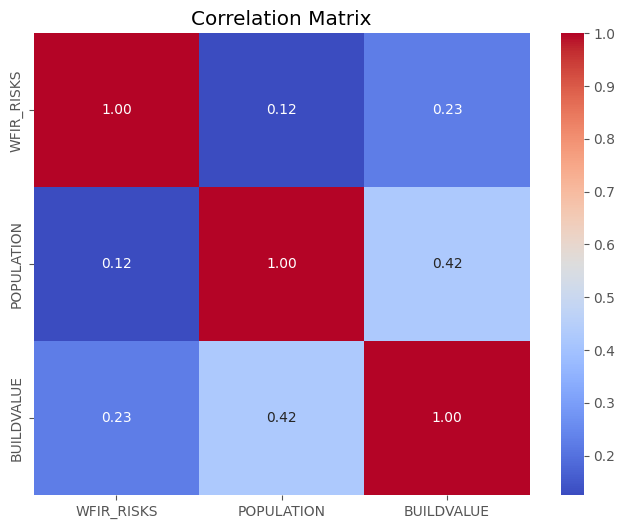

In [25]:
# Calculate the correlation matrix
correlation_matrix = df_cleaned[['WFIR_RISKS', 'POPULATION', 'BUILDVALUE']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [28]:
df_cleaned.dtypes

,0
STATE,object
STATEABBRV,object
COUNTY,object
TRACTFIPS,int64
POPULATION,int64
BUILDVALUE,int64
AGRIVALUE,int64
AREA,float64
WFIR_RISKS,float64
WFIR_RISKR,object


In [ ]:
# Consider mapping ordinal data to numeric
#risk_mapping = {'Very High': 4, 'High': 3, 'Moderate': 2, 'Relatively Low':1, 'Relatively Moderate': 1.5, 'Very Low': 0}
#df_cleaned['WFIR_RISKR_Numeric'] = df_cleaned['WFIR_RISKR'].map(risk_mapping)

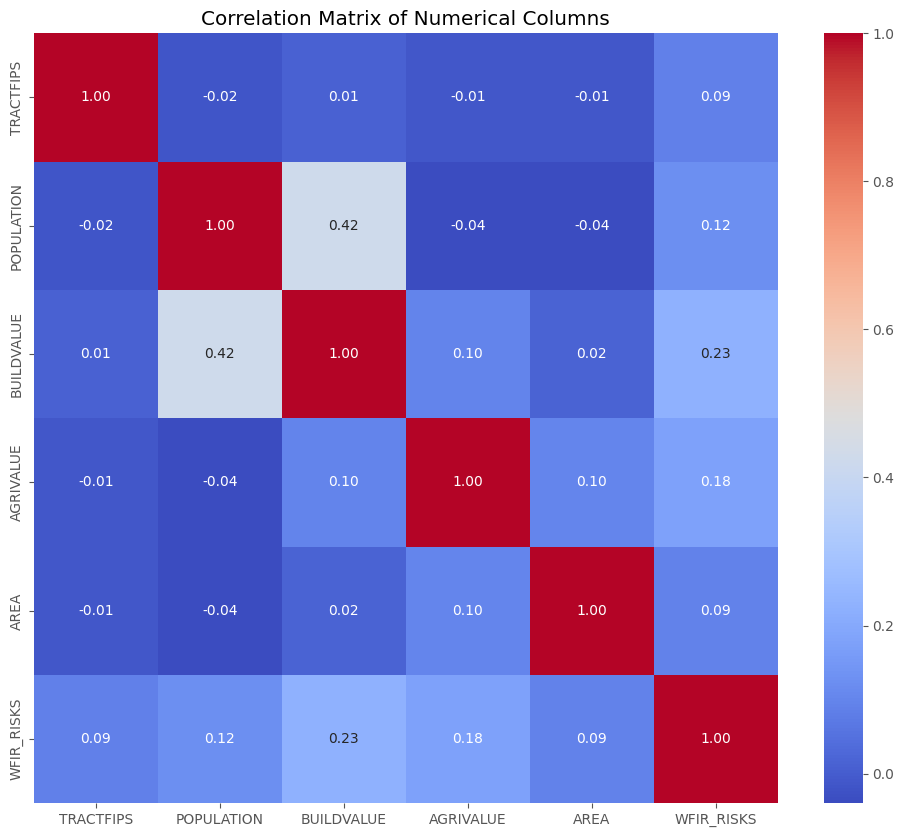

In [29]:
# Select numerical columns
numerical_columns = df_cleaned.select_dtypes(include=['number']).columns
correlation_matrix = df_cleaned[numerical_columns].corr()

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()